In [1]:
#-*- encoding:utf-8 -*-
from __future__ import print_function
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import csv
import sys
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
try:
    reload(sys)
    sys.setdefaultencoding('utf-8')
except:
    pass

import codecs
from textrank4zh import TextRank4Keyword, TextRank4Sentence


In [9]:
dict_1 = {}
for tt in range(0,3):  
    a=str(tt)+'.txt'
    text = codecs.open(str(a), 'r', 'utf-8').read()
    tr4w = TextRank4Keyword()

    tr4w.analyze(text=text, lower=True, window=2)  # py2中text必须是utf8编码的str或者unicode对象，py3中必须是utf8编码的bytes或者str对象
    print()
   # print( '关键词：' )
    for item in tr4w.get_keywords(10, word_min_len=1):
        if dict_1.__contains__(item.word):
           if dict_1[item.word]<item.weight:
               item.weight=dict_1[item.word]          
        else:               
            dict_1[item.word]= item.weight
rank_1=sorted(dict_1.items(), key =lambda x : x[1],reverse=True)
print(dict_1)
# freq_dict = {k:v for k,v in dict_1.items()}
# v_sorted1 = sorted(freq_dict, key=freq_dict.get, reverse=True) 
# print(freq_dict)
    # print( '关键短语：' )
    # for phrase in tr4w.get_keyphrases(keywords_num=20, min_occur_num= 2):
    #     print(phrase)

    # tr4s = TextRank4Sentence()
    # tr4s.analyze(text=text, lower=True, source = 'all_filters')

    # print()
    # print( '摘要：' )
    # for item in tr4s.get_key_sentences(num=3):
    #     print(item.index, item.weight, item.sentence)  # index是语句在文本中位置，weight是权重




{'美國': 0.02333188687156761, 'fed': 0.02141642021018861, '通膨': 0.010050711380437045, '衰退': 0.009954148424421069, '烏克蘭': 0.009342784694289376, '會': 0.008626482944168571, '成長': 0.007090058644941287, '歐洲': 0.0070439400542571026, '波動': 0.0069711771211322295, '俄羅斯': 0.006920428935230063, '讓': 0.04806707855894131, '取代': 0.030983823897580753, '漲': 0.030983823897580753, '不了': 0.030983823897580753, '夢': 0.027563601147241778, '醒': 0.027563601147241778, '高點': 0.027563601147241778, '時能': 0.027563601147241778, '離開': 0.025400928321127614, '最初': 0.025400928321127614, '大立光': 0.01895518784955063, '月': 0.017741375760257302, '執行': 0.014070934130098328, '恩平': 0.013811148453465457, '於': 0.01317492357792287, '專利': 0.012843558850603594, '公司': 0.01268796002532183, '股': 0.01231310391589223, '買回': 0.012283819448012634}


In [1]:

from gensim.test.utils import common_texts
from gensim.models import word2vec,KeyedVectors

seed = 666
sg = 0 
window_size = 10
vector_size = 400
min_count = 0
workers = 8
epochs = 5
batch_words = 150

train_data = word2vec.LineSentence('key.txt')
model = word2vec.Word2Vec(
  
    train_data,
    min_count=min_count,
    vector_size=vector_size,
    workers=workers,
    epochs=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words
)

model.wv.save_word2vec_format('word2vec')


In [2]:
model=KeyedVectors.load_word2vec_format('word2vec')
print(model.vectors[:])

[[ 0.0019555   0.00132078 -0.00123293 ... -0.00078306 -0.00232353
   0.00231959]
 [ 0.00011133  0.00168274 -0.00143064 ...  0.00054267  0.00053552
   0.00216328]
 [-0.00033337  0.00036396 -0.00148167 ...  0.00211685  0.00093903
  -0.00205091]
 ...
 [ 0.00226889  0.00160627  0.00126978 ... -0.00162737  0.00201145
   0.00084024]
 [-0.00124148  0.00052647  0.00221142 ...  0.00017277  0.00193075
  -0.00027892]
 [-0.00123064 -0.00119751 -0.00182903 ... -0.00054539 -0.00226111
   0.00115727]]


In [6]:
# 200維向量的資料降為2維
rawWordVec = model.vectors
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
X_reduced

array([[ 1.82675198e-03,  7.37883092e-04],
       [-3.22629255e-03,  4.26949933e-03],
       [-1.10879273e-03, -2.77138245e-03],
       [-2.84868688e-03, -1.68909528e-03],
       [ 1.39528350e-03,  1.71160453e-03],
       [ 1.50488806e-03, -3.24763404e-03],
       [ 1.72900991e-03, -3.78976157e-03],
       [ 8.43948219e-04,  4.91987355e-03],
       [-1.64871756e-03, -1.12611311e-03],
       [-2.46479851e-03,  2.41931016e-03],
       [-1.43117795e-04, -4.56015521e-04],
       [ 5.03791030e-03,  1.84671616e-03],
       [-4.45046509e-03,  1.68380712e-03],
       [ 1.90983014e-03,  5.12578350e-04],
       [-1.86390651e-04, -5.81205450e-03],
       [ 1.80230499e-03,  1.42956828e-03],
       [-2.46270560e-03,  1.14217133e-03],
       [-4.37690120e-04,  4.20465041e-03],
       [-2.34217546e-03, -1.78036594e-03],
       [-7.83507014e-04, -1.98321213e-04],
       [ 1.48401817e-03,  6.01146091e-03],
       [-3.18669318e-03, -2.27880431e-03],
       [ 1.62660494e-03,  1.88155670e-03],
       [-1.

<AxesSubplot:>

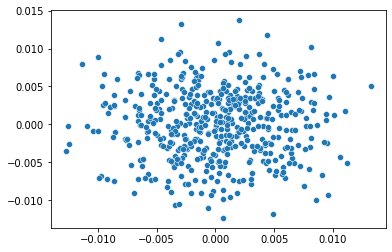

In [142]:
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1])

In [8]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(X_reduced)
kmeans.predict(X_reduced)


array([5, 0, 1, 6, 5, 8, 8, 9, 1, 0, 1, 5, 4, 3, 8, 5, 7, 9, 6, 1, 9, 6,
       5, 1, 3, 7, 1, 8, 6, 9, 0, 8, 9, 7, 3, 6, 4, 6, 3, 7, 9, 3, 0, 1,
       0, 4, 2, 0, 4, 7, 7, 8, 4, 5, 6, 3, 3, 4, 7, 1, 7, 6, 7, 1, 5, 7,
       4, 1, 6, 6, 7, 5, 7, 7, 7, 2, 1, 1, 3, 5, 8, 6, 1, 9, 3, 4, 8, 3,
       4, 5, 5, 6, 2, 7, 8, 6, 4, 6, 6, 0, 3, 9, 5, 8, 6, 7, 6, 3, 3, 1,
       9, 7, 7, 5, 8, 9, 6, 3, 2, 1, 7, 8, 0, 8, 3, 5, 1, 1, 7, 7, 2, 4,
       2, 8, 1, 8, 1, 7, 5, 2, 1, 8, 8, 5, 7, 2, 1, 7, 8, 0, 5, 7, 8, 1,
       9, 3, 7, 1, 7, 1, 0, 6, 3, 8, 7, 5, 3, 7, 2, 1, 7, 4, 4, 3, 2, 6,
       5, 7, 7, 7, 3, 2, 9, 7, 8, 9, 1, 4, 3, 9, 0, 7, 5, 0, 3, 9, 6, 8,
       3, 6, 1, 2, 5, 1, 7, 5, 2, 7, 4, 8, 2, 5, 6, 1, 4, 0, 5, 7, 7, 8,
       3, 9, 7, 1, 5, 6, 1, 2, 5, 8, 1, 9, 6, 7, 1, 1, 5, 7, 5, 3, 1, 7,
       1, 5, 1, 8, 7, 4, 7, 1, 0, 0, 7, 4, 3, 7, 6, 3, 8, 9, 4, 6, 2, 6,
       2, 8, 3, 2, 7, 1, 5, 7, 8, 8, 6, 5, 6, 1, 9, 6, 2, 1, 4, 7, 1, 5,
       9, 5, 6, 1, 6, 8, 5, 9, 3, 1, 1, 5, 4, 7, 3,

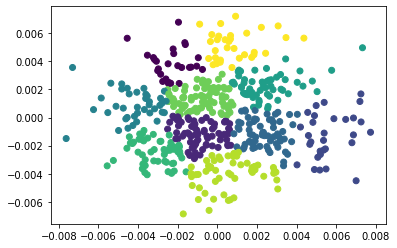

In [9]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=kmeans.predict(X_reduced))

# 使用说明
类TextRank4Keyword、TextRank4Sentence在处理一段文本时会将文本拆分成4种格式：

sentences：由句子组成的列表。
words_no_filter：对sentences中每个句子分词而得到的两级列表。
words_no_stop_words：去掉words_no_filter中的停止词而得到的二维列表。
words_all_filters：保留words_no_stop_words中指定词性的单词而得到的二维列表。

这间酒店位于北京东三环，里面摆放很多雕塑，文艺气息十足。答谢宴于晚上8点开始。

In [8]:
#-*- encoding:utf-8 -*-
from __future__ import print_function
import codecs
from textrank4zh import TextRank4Keyword, TextRank4Sentence

import sys
try:
    reload(sys)
    sys.setdefaultencoding('utf-8')
except:
    pass

text = "这间酒店位于北京东三环，里面摆放很多雕塑，文艺气息十足。答谢宴于晚上8点开始。"
tr4w = TextRank4Keyword()

tr4w.analyze(text=text, lower=True, window=2)

print()
print('sentences:')
for s in tr4w.sentences:
    print(s)                 # py2中是unicode类型。py3中是str类型。

print()
print('words_no_filter')
for words in tr4w.words_no_filter:
    print('/'.join(words))   # py2中是unicode类型。py3中是str类型。

print()
print('words_no_stop_words')
for words in tr4w.words_no_stop_words:
    print('/'.join(words))   # py2中是unicode类型。py3中是str类型。

print()
print('words_all_filters')
for words in tr4w.words_all_filters:
    print('/'.join(words))   # py2中是unicode类型。py3中是str类型。


sentences:
这间酒店位于北京东三环，里面摆放很多雕塑，文艺气息十足
答谢宴于晚上8点开始

words_no_filter
这/间/酒店/位于/北京/东三环/里面/摆放/很多/雕塑/文艺/气息/十足
答谢/宴于/晚上/8/点/开始

words_no_stop_words
间/酒店/位于/北京/东三环/里面/摆放/很多/雕塑/文艺/气息/十足
答谢/宴于/晚上/8/点

words_all_filters
酒店/位于/北京/东三环/摆放/雕塑/文艺/气息
答谢/宴于/晚上


In [3]:
文獻出處
https://github.com/letiantian/TextRank4ZH

SyntaxError: invalid syntax (2275004121.py, line 2)